In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

music_data = pd.read_csv("Resources/top10s.csv", encoding = "ISO-8859-1")

In [20]:
music_df = pd.DataFrame(music_data)
music_df.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [21]:
columns = {"title": "Title", "artist": "Artist", "top genre": "Top Genre", "year": "Year", "bpm": "Beats per Minute (BPM)", 
           "nrgy": "Energy", "dnce": "Danceability", "dB": "Loudness (dB)", "live": "Liveness", "val": "Valence", 
           "dur": "Duration (sec)", "acous": "Acousticness", "spch": "Speechiness", "pop": "Popularity"}

clean_music_df = music_df.rename(columns = columns)
clean_music_df.head()

,Unnamed: 0,Title,Artist,Top Genre,Year,Beats per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Duration (sec),Acousticness,Speechiness,Popularity
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [22]:
music_subset_data_df=pd.DataFrame(clean_music_df,columns=['Title','Artist','Year','Energy',
                                                          'Danceability','Valence','Popularity'])
music_subset_data_df.head()

,Title,Artist,Year,Energy,Danceability,Valence,Popularity
0,"Hey, Soul Sister",Train,2010,89,67,80,83
1,Love The Way You Lie,Eminem,2010,93,75,64,82
2,TiK ToK,Kesha,2010,84,76,71,80
3,Bad Romance,Lady Gaga,2010,92,70,71,79
4,Just the Way You Are,Bruno Mars,2010,84,64,43,78


In [23]:
avg_music_data_by_year_df=music_subset_data_df.groupby('Year').mean()
avg_music_data_by_year_df

,Energy,Danceability,Valence,Popularity
Year,,,,
2010,77.901961,64.529412,57.000000,64.254902
2011,74.886792,63.641509,53.698113,61.867925
2012,75.485714,65.714286,64.171429,67.771429
2013,73.873239,62.042254,53.183099,63.985915
2014,67.775862,62.534483,52.086207,62.706897
2015,70.336842,63.663158,52.526316,64.568421
2016,67.237500,63.325000,45.150000,64.162500
2017,69.169231,65.369231,52.276923,69.015385
2018,65.468750,67.203125,48.765625,72.437500


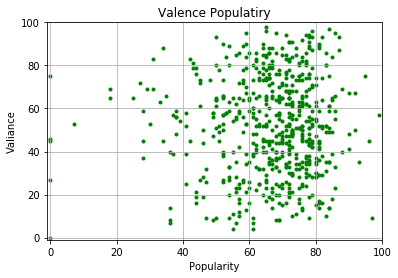

In [44]:
#Valience Popularity Plot

plt.ylim(-1, 100)
plt.xlim(-1,100)
plt.title('Valence Populatiry')
plt.xlabel('Popularity')
plt.ylabel('Valiance')
plt.grid(axis='both')

plt.scatter(clean_music_df['Popularity'],clean_music_df['Valence'], marker='.',  c='g'  )
plt.savefig('Valence.png')

plt.show()

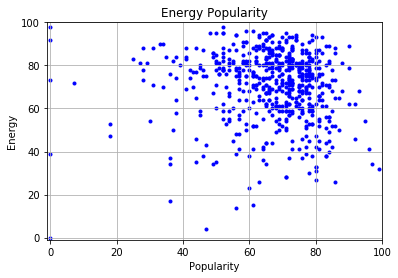

In [43]:
#Valience Popularity Plot

plt.ylim(-1, 100)
plt.xlim(-1,100)
plt.title('Energy Popularity')
plt.xlabel('Popularity')
plt.ylabel('Energy')
plt.grid(axis='both')

plt.scatter(clean_music_df['Popularity'],clean_music_df['Energy'], marker='.', c='b' )
plt.savefig('Energy.png')
plt.show()

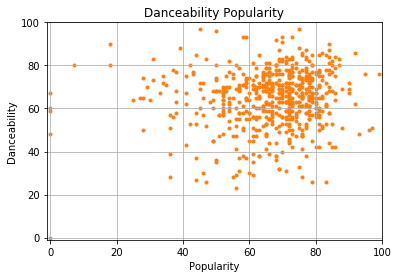

In [42]:
#Valience Popularity Plot

plt.ylim(-1, 100)
plt.xlim(-1,100)
plt.title('Danceability Popularity')
plt.xlabel('Popularity')
plt.ylabel('Danceability')
plt.grid(axis='both')

plt.scatter(clean_music_df['Popularity'],clean_music_df['Danceability'], marker='.',c='tab:orange'  )
plt.savefig('Danceability.png')
plt.show()

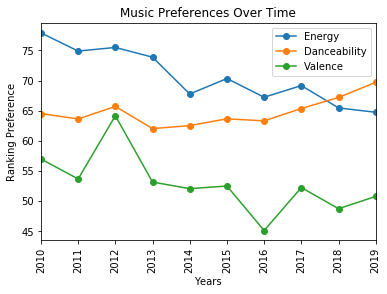

In [38]:
new_df=pd.DataFrame(avg_music_data_by_year_df,columns=['Energy','Danceability','Valence'])
ax=new_df.plot(marker='o',title='Music Preferences Over Time', rot=90  )
ax.set_ylabel("Ranking Preference")
ax.set_xlabel("Years")
ax.figure.savefig('PrefsOverTime.png')